<a href="https://colab.research.google.com/github/Mwaniki25/football-prediction_supervised_learning/blob/main/mchezopesa_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A case study for For Predicting Goals scored for MchezoPesa Ltd.

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)



### b) Defining the Metric for Success

 > - Create a polynomial regression model that predicts how many goals the home team scores with an RMSE score that is less than a fifth of the mean.
-Create a polynomial regression model that predicts how many goals the away team scores with an RMSE score that is less than a fifth of the mean.
-Create an ordinal logistic model thar can predict who wins, loses or draws in a match with a high level of accuracy.

### c) Understanding the context 
>Context 
- A more detailed explanation and history of the rankings is available here: https://en.wikipedia.org/wiki/FIFA_World_Rankings
- An explanation of the ranking procedure is available here: https://www.fifa.com/fifa-world-ranking/procedure/men.html

### d) Recording the Experimental Design
> Expected flow for the assessment:
Perform your EDA
Perform any necessary feature engineering 
Check of multicollinearity
Start building the model
Cross-validate the model
Compute RMSE
Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
Perform appropriate regressions on the data including your justification
Challenge your solution by providing insights on how you can make improvements.

## 2. Reading the Data

In [205]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
# Loading the Datasets
#

#loading the FiFa ranking dataset while specifying the datetime column
ranks = pd.read_csv('fifa_ranking.csv', parse_dates=['rank_date'])
ranks.head(5)


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [207]:
# Loading the FiFa results Dataset while specifying the datetime column
results = pd.read_csv('results.csv',parse_dates=['date'])
results.head(5)
#

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking the Data

In [208]:
# Lets check the shapes of our datasets and display the results

print('Shape of Rank Dataset :', 'The ranking dataset has ', ranks.shape[0],' rows and ', ranks.shape[1],' columns')
print('Shape of Results Dataset :', 'The results dataset has ', results.shape[0], ' rows and ', results.shape[1], ' columns')

Shape of Rank Dataset : The ranking dataset has  57793  rows and  16  columns
Shape of Results Dataset : The results dataset has  40839  rows and  9  columns


In [209]:
# Checking whether each column has an appropriate datatype
#
ranks.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [210]:
# Checking whether each column has an appropriate datatype
#
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here using data from this llink https://www.fifa.com/fifa-world-ranking/ranking-table/men/

### a.Validation

## 5. Tidying the Dataset

In [211]:
# We will now drop the duplicate rows from our ranking data except for the first occurrence

ranks_df = ranks.drop_duplicates(keep = 'first')

In [212]:
# Now we check for the number of rows that have been dropped
#
print('Fifa Ranking Data : ', ranks.shape[0] - ranks_df.shape[0] , 'rows have been dropped')

Fifa Ranking Data :  37 rows have been dropped


In [213]:
# Lets check for null values in the ranks dataset

ranks_df.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [214]:
# Checking for null values in the results dataset

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [215]:
ranks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57756 non-null  int64         
 1   country_full             57756 non-null  object        
 2   country_abrv             57756 non-null  object        
 3   total_points             57756 non-null  float64       
 4   previous_points          57756 non-null  int64         
 5   rank_change              57756 non-null  int64         
 6   cur_year_avg             57756 non-null  float64       
 7   cur_year_avg_weighted    57756 non-null  float64       
 8   last_year_avg            57756 non-null  float64       
 9   last_year_avg_weighted   57756 non-null  float64       
 10  two_year_ago_avg         57756 non-null  float64       
 11  two_year_ago_weighted    57756 non-null  float64       
 12  three_year_ago_avg       57756 n

In [216]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [217]:
# Now to create new columns and split the date colums into month and year.
#
# For the year columns

ranks_df['year'] = ranks_df.rank_date.dt.year
results['year'] = results.date.dt.year

# Now for the month columns

ranks_df['month'] = ranks_df.rank_date.dt.month
results['month'] = results.date.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [218]:
# Preview changes
#  
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [219]:
# Preview changes
#  
ranks_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [220]:

# We now merge the two datasets for form one that we will use for analysis

home = pd.merge(results, ranks_df,  left_on = ['home_team', 'year', 'month'], right_on = ['country_full', 'year', 'month'],  how = 'inner' )

home.shape
print('Our home dataset has ', home.shape[0], 'rows and ', home.shape[1], 'columns')

Our home dataset has  18593 rows and  27 columns


In [221]:
#  Merging the ranking dataset to the result dataset on the away_team, year and month columns

away = pd.merge(results, ranks_df, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'country_full'])

print('Our away dataset has ', away.shape[0], 'rows and ', away.shape[1], 'columns')

Our away dataset has  18502 rows and  27 columns


In [222]:
# Renaming the ranks columns to get the home team and away team ranks
#
home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
away.rename({'rank' : 'away_rank'}, axis =1, inplace = True)

In [223]:
home.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [224]:
away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'away_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [225]:
# creating away ranks df since home and away seem to have similar columns
away_ranks = away[['away_team','away_rank','year','month']]
away_ranks.head()


,away_team,away_rank,year,month
0,Paraguay,67,1993,8
1,Paraguay,67,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Argentina,5,1993,8


In [226]:
# Merrging our data frames

final_fifa  = pd.merge(home, away_ranks, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

final_fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5


In [227]:
print(final_fifa.shape, '\n')
print('Presence of duplicated records: ', final_fifa.duplicated().any(), '\n')
print('Number of duplicate records: ', final_fifa.duplicated().sum())

(28439, 28) 

Presence of duplicated records:  True 

Number of duplicate records:  11535


In [228]:
# Dropping duplicate rows from the dataset
#
final_fifa.drop_duplicates(keep = 'first', inplace = True)

In [229]:
# Resettinfg the index column after dropping duplicate values
final_fifa.reset_index(drop = True, inplace = True)

In [230]:
final_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16904 entries, 0 to 16903
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     16904 non-null  datetime64[ns]
 1   home_team                16904 non-null  object        
 2   away_team                16904 non-null  object        
 3   home_score               16904 non-null  int64         
 4   away_score               16904 non-null  int64         
 5   tournament               16904 non-null  object        
 6   city                     16904 non-null  object        
 7   country                  16904 non-null  object        
 8   neutral                  16904 non-null  bool          
 9   year                     16904 non-null  int64         
 10  month                    16904 non-null  int64         
 11  home_rank                16904 non-null  int64         
 12  country_full             16904 n

In [231]:
#choosing the relevant columns
fifa = final_fifa[["year","home_team","away_team","home_score","away_score",'home_rank', 'away_rank', 'tournament']]
fifa.head()

,year,home_team,away_team,home_score,away_score,home_rank,away_rank,tournament
0,1993,Colombia,Paraguay,0,0,19,67,FIFA World Cup qualification
1,1993,Argentina,Paraguay,0,0,5,67,FIFA World Cup qualification
2,1993,Colombia,Argentina,2,1,19,5,FIFA World Cup qualification
3,1993,Peru,Argentina,0,1,70,5,FIFA World Cup qualification
4,1993,Paraguay,Argentina,1,3,67,5,FIFA World Cup qualification


In [232]:
# Rearranging the columns

fifa = fifa[["year","home_team","home_score","away_team","away_score",'home_rank', 'away_rank','tournament']]
fifa.head()

,year,home_team,home_score,away_team,away_score,home_rank,away_rank,tournament
0,1993,Colombia,0,Paraguay,0,19,67,FIFA World Cup qualification
1,1993,Argentina,0,Paraguay,0,5,67,FIFA World Cup qualification
2,1993,Colombia,2,Argentina,1,19,5,FIFA World Cup qualification
3,1993,Peru,0,Argentina,1,70,5,FIFA World Cup qualification
4,1993,Paraguay,1,Argentina,3,67,5,FIFA World Cup qualification


In [233]:
# Removing  Outliers
#
# We take care of the outliers/anomalies using the interquatile ranges formula to have 
# a more sensible data set.

Q1 = fifa.quantile(0.25)
Q3 = fifa.quantile(0.75)
IQR = Q3 - Q1

fifa = fifa[~((fifa < (Q1 - 1.5 * IQR)) |(fifa > (Q3 + 1.5 * IQR))).any(axis=1)]

In [234]:
#converting the tournament column to 3categories(Worldcup, friendly and other matches)
## Converting the tournament columns to: World cup, Friendly and others
def tournament(games):
    if (games == 'FIFA World Cup qualification') or (games == 'FIFA World Cup'):
        return 'World_Cup'
    if games == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'
# Applying the function above

fifa['tournament_type'] = fifa['tournament'].apply(lambda w: tournament(w))
fifa['tournament_type'].unique()

array(['World_Cup', 'Friendly', 'Other Matches'], dtype=object)

In [235]:
#creating a column(final_score) that shows whether the match ended in a win, loss or draw
fifa['total_score'] = fifa['home_score'] - fifa['away_score']
def home_team(home_score):
    if home_score > 0:
        return 'Win'
    elif home_score < 0:
        return 'Loss'
    else:
        return 'Draw'
      
fifa['Status (W,L,D)'] = fifa.total_score.apply(lambda h: home_team(h))
fifa.head(5)

,year,home_team,home_score,away_team,away_score,home_rank,away_rank,tournament,tournament_type,total_score,"Status (W,L,D)"
0,1993,Colombia,0,Paraguay,0,19,67,FIFA World Cup qualification,World_Cup,0,Draw
1,1993,Argentina,0,Paraguay,0,5,67,FIFA World Cup qualification,World_Cup,0,Draw
2,1993,Colombia,2,Argentina,1,19,5,FIFA World Cup qualification,World_Cup,1,Win
3,1993,Peru,0,Argentina,1,70,5,FIFA World Cup qualification,World_Cup,-1,Loss
4,1993,Paraguay,1,Argentina,3,67,5,FIFA World Cup qualification,World_Cup,-2,Loss


In [236]:
#
drop_cols = ['tournament','total_score']
fifa.drop(drop_cols, axis = 1, inplace = True)

In [237]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16903
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             16327 non-null  int64 
 1   home_team        16327 non-null  object
 2   home_score       16327 non-null  int64 
 3   away_team        16327 non-null  object
 4   away_score       16327 non-null  int64 
 5   home_rank        16327 non-null  int64 
 6   away_rank        16327 non-null  int64 
 7   tournament_type  16327 non-null  object
 8   Status (W,L,D)   16327 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [238]:
# Identifying the Missing Data
#
fifa.isnull().sum()

year               0
home_team          0
home_score         0
away_team          0
away_score         0
home_rank          0
away_rank          0
tournament_type    0
Status (W,L,D)     0
dtype: int64

In [239]:
# More data cleaning procedures
#
fifa.duplicated().sum()

41

In [240]:
#
fifa.drop_duplicates(keep = 'first', inplace = True)

In [241]:
fifa.shape

(16286, 9)

In [242]:
# Renaming the columns



fifa.rename(columns={'home_score': 'home_team_score', 'away_score':'away_team_score', 'home_rank':'home_team_rank',
'away_rank':'away_team_rank'},
inplace = True)


In [243]:
fifa.head()

,year,home_team,home_team_score,away_team,away_team_score,home_team_rank,away_team_rank,tournament_type,"Status (W,L,D)"
0,1993,Colombia,0,Paraguay,0,19,67,World_Cup,Draw
1,1993,Argentina,0,Paraguay,0,5,67,World_Cup,Draw
2,1993,Colombia,2,Argentina,1,19,5,World_Cup,Win
3,1993,Peru,0,Argentina,1,70,5,World_Cup,Loss
4,1993,Paraguay,1,Argentina,3,67,5,World_Cup,Loss


## 6. Exploratory Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


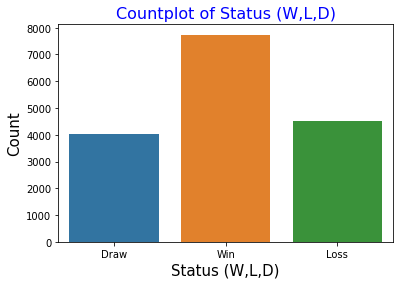

In [244]:
# visualizing the win draw and lose on a bar plot
sns.countplot('Status (W,L,D)',data = fifa)
plt.xlabel("Status (W,L,D)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Countplot of Status (W,L,D)",fontsize=16,color='blue')
plt.show()
#generally, there is a high probability to win a match than lose or draw

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


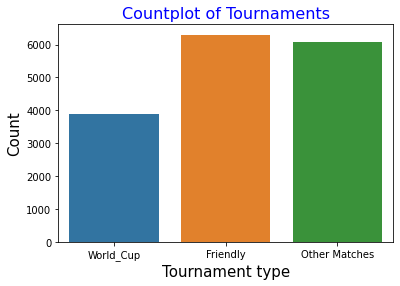

In [245]:
# visualizing the tournaments on a bar plot
sns.countplot('tournament_type',data = fifa)
plt.xlabel("Tournament type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Countplot of Tournaments",fontsize=16,color='blue')
plt.show()

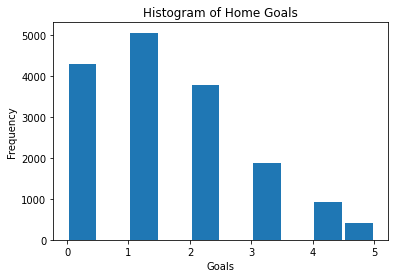

In [246]:
# Histogram for Home team scores



goals = fifa['home_team_score']

plt.hist(goals, histtype='bar', rwidth=0.9)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Histogram of Home Goals')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


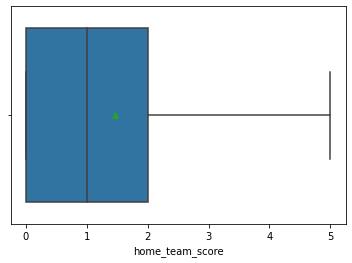

In [247]:

## boxplot for home goals
sns.boxplot(fifa['home_team_score'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


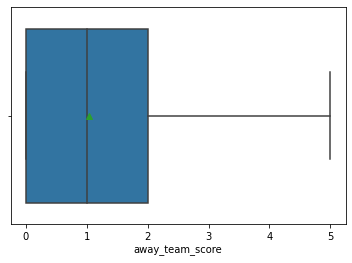

In [248]:
## boxplot for aways goals
sns.boxplot(fifa['away_team_score'], showmeans=True)

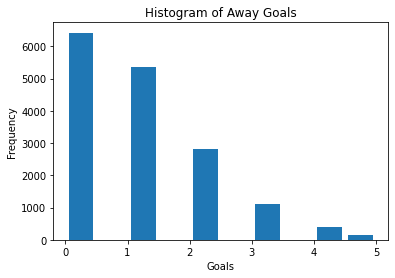

In [249]:
# Histogram for Away team scores



goals = fifa['away_team_score']

plt.hist(goals, histtype='bar', rwidth=0.8)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Histogram of Away Goals')
plt.show()

In [250]:
# Creating a column of total goals scored
#
fifa['total_goals'] = fifa.home_team_score + fifa.away_team_score

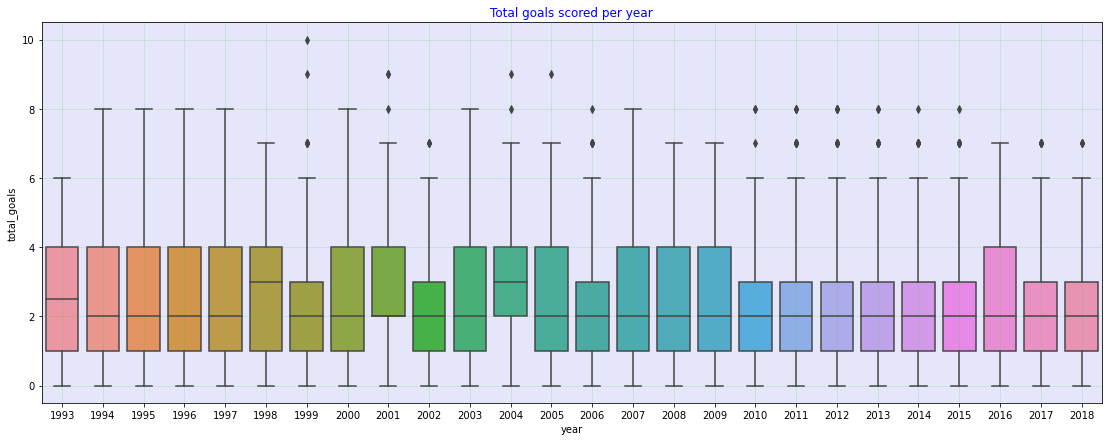

In [251]:
# Plotting boxplots of year against total goals scored
#
plt.figure(figsize=(19,7))  # Setting the figure size to 19 by 7
ax = sns.boxplot(y=fifa.total_goals,x=fifa.year) # Plotting the boxplots for each year
ax.set_facecolor('lavender')
plt.grid(True, color = 'limegreen', alpha = 0.2)
plt.title("Total goals scored per year",color='b')
plt.show()

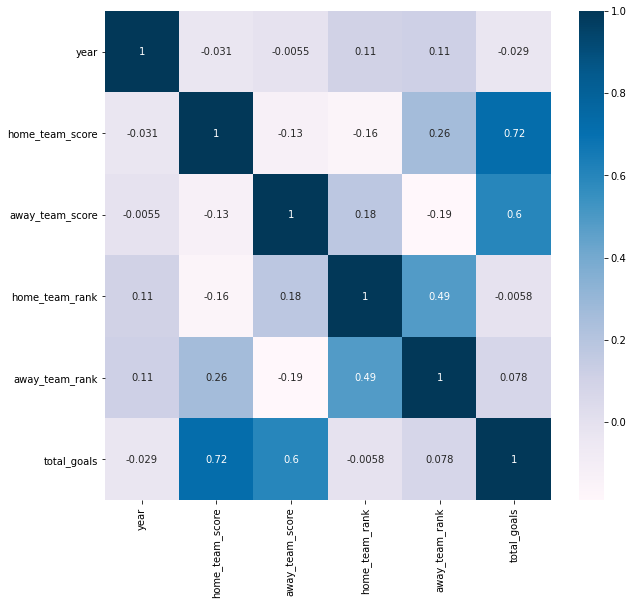

In [252]:
plt.figure(figsize =(10,9))
sns.heatmap(fifa.corr(), cmap= "PuBu", annot = True)
plt.show()

## 7. Implementing the Solution

## Check for multi colliniearity


In [253]:
# Let's display the correlations between the variables
corr = fifa[['home_team_score','away_team_score','home_team_rank','away_team_rank'	]].corr()
corr

,home_team_score,away_team_score,home_team_rank,away_team_rank
home_team_score,1.000000,-0.125958,-0.159960,0.260676
away_team_score,-0.125958,1.000000,0.177278,-0.190530
home_team_rank,-0.159960,0.177278,1.000000,0.487146
away_team_rank,0.260676,-0.190530,0.487146,1.000000


                 home_team_score  ...  away_team_rank
home_team_score         1.214550  ...       -0.552071
away_team_score        -0.035436  ...        0.434338
home_team_rank          0.469501  ...       -1.000242
away_team_rank         -0.552071  ...        1.713929

[4 rows x 4 columns]


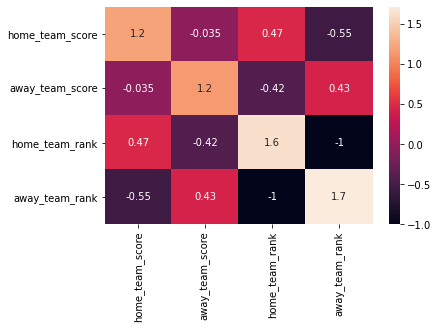

In [254]:
#computing the VIF(which is the inverse of the correlation matrix)
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
print(vif_df)


sns.heatmap(vif_df, annot = True)
plt.show()

# The heat map below shows VIF values that are very close to 0 meaning that there is very little multi-collinearity.

## Polynomial Regression
> - Predicting Home scores

In [255]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16286 entries, 0 to 16903
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             16286 non-null  int64 
 1   home_team        16286 non-null  object
 2   home_team_score  16286 non-null  int64 
 3   away_team        16286 non-null  object
 4   away_team_score  16286 non-null  int64 
 5   home_team_rank   16286 non-null  int64 
 6   away_team_rank   16286 non-null  int64 
 7   tournament_type  16286 non-null  object
 8   Status (W,L,D)   16286 non-null  object
 9   total_goals      16286 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [256]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [257]:
X = fifa['home_team_rank'].values.reshape(-1, 1)
y = fifa['home_team_score']
print(X)
print('**********************************')
print(y)

[[19]
 [ 5]
 [19]
 ...
 [61]
 [ 5]
 [48]]
**********************************
0        0
1        0
2        2
3        0
4        1
        ..
16899    1
16900    4
16901    0
16902    1
16903    2
Name: home_team_score, Length: 16286, dtype: int64


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [259]:
# Import the function "PolynomialFeatures" from sklearn, to preprocess our data
# Import LinearRegression model from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..
 
pre_process = PolynomialFeatures(degree=6)
# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)
# Show the transformation on the notebook
X_poly

array([[1.00000000e+00, 1.90000000e+01, 3.61000000e+02, ...,
        1.30321000e+05, 2.47609900e+06, 4.70458810e+07],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, ...,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04],
       [1.00000000e+00, 1.90000000e+01, 3.61000000e+02, ...,
        1.30321000e+05, 2.47609900e+06, 4.70458810e+07],
       ...,
       [1.00000000e+00, 6.10000000e+01, 3.72100000e+03, ...,
        1.38458410e+07, 8.44596301e+08, 5.15203744e+10],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, ...,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04],
       [1.00000000e+00, 4.80000000e+01, 2.30400000e+03, ...,
        5.30841600e+06, 2.54803968e+08, 1.22305905e+10]])

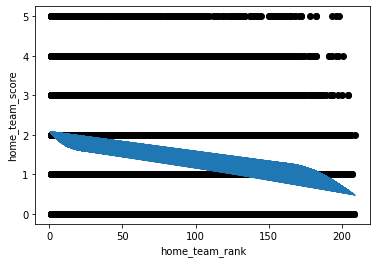

In [260]:
pr_model = LinearRegression()
# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, y)
# Store our predicted Humidity values in the variable y_new
y_pred = pr_model.predict(X_poly)
# Plot our model on our data
plt.scatter(X, y, c = "black")
plt.xlabel("home_team_rank")
plt.ylabel("home_team_score")
plt.plot(X, y_pred)

In [261]:

# A “_” is used to ignore the first value in pr_model.coef as this is given by default as 0. The other two co-efficients are labelled theta1 and theta 2 respectively.
theta0 = pr_model.intercept_
_, theta1, theta2 , theta3, theta4, theta5, theta6= pr_model.coef_
theta0, theta1, theta2, theta3, theta4, theta5, theta6

(2.1223835454478612,
 -0.051041168323810865,
 0.001843990596671594,
 -3.155065584697289e-05,
 2.598222242574889e-07,
 -1.0053362381945083e-09,
 1.4597559272466754e-12)

In [262]:
# Predict goals for home team with rank 1
# we expect at least two goals from home team with rank 1
# pre_process.fit_transform
y_new = pr_model.predict(pre_process.fit_transform([[1]]))
y_new

array([2.07315508])

In [263]:
#  evaluate model
# 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

# The RMSE score for the model is quite high hence low predictive capability

Root Mean Squared Error: 1.2605757964424116


### Predict away scores

In [264]:
X = fifa['away_team_rank'].values.reshape(-1, 1)
y = fifa['away_team_score']
print(X)
print('**********************************')
print(y)

[[67]
 [67]
 [ 5]
 ...
 [ 8]
 [22]
 [22]]
**********************************
0        0
1        0
2        1
3        1
4        3
        ..
16899    2
16900    2
16901    1
16902    1
16903    0
Name: away_team_score, Length: 16286, dtype: int64


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [266]:
# Import the function "PolynomialFeatures" from sklearn, to preprocess our data
# Import LinearRegression model from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..
 
pre_process = PolynomialFeatures(degree=6)
# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)
# Show the transformation on the notebook
X_poly

array([[1.00000000e+00, 6.70000000e+01, 4.48900000e+03, ...,
        2.01511210e+07, 1.35012511e+09, 9.04583822e+10],
       [1.00000000e+00, 6.70000000e+01, 4.48900000e+03, ...,
        2.01511210e+07, 1.35012511e+09, 9.04583822e+10],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, ...,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04],
       ...,
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, ...,
        4.09600000e+03, 3.27680000e+04, 2.62144000e+05],
       [1.00000000e+00, 2.20000000e+01, 4.84000000e+02, ...,
        2.34256000e+05, 5.15363200e+06, 1.13379904e+08],
       [1.00000000e+00, 2.20000000e+01, 4.84000000e+02, ...,
        2.34256000e+05, 5.15363200e+06, 1.13379904e+08]])

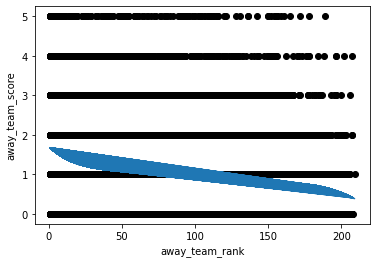

In [267]:
pr_model = LinearRegression()
# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, y)
# Store our predicted Humidity values in the variable y_new
y_pred = pr_model.predict(X_poly)
# Plot our model on our data
plt.scatter(X, y, c = "black")
plt.xlabel("away_team_rank")
plt.ylabel("away_team_score")
plt.plot(X, y_pred)

In [268]:
# A “_” is used to ignore the first value in pr_model.coef as this is given by default as 0. The other two co-efficients are labelled theta1 and theta 2 respectively.
theta0 = pr_model.intercept_
_, theta1, theta2 , theta3, theta4, theta5, theta6= pr_model.coef_
theta0, theta1, theta2, theta3, theta4, theta5, theta6

(1.7088412641544068,
 -0.0358667663986398,
 0.0008966553743791112,
 -1.2232361156303025e-05,
 8.505691837410823e-08,
 -2.8230830168137974e-10,
 3.476038901162326e-13)

In [269]:
# Predict goals for away team with rank 1
# we expect at least one goals from away team with rank 1
# pre_process.fit_transform
y_new = pr_model.predict(pre_process.fit_transform([[1]]))
y_new

array([1.67385901])

In [270]:
#  evaluate model
# 

from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

# The RMSE score for the model is quite high hence low predictive capability

Root Mean Squared Error: 1.07971630711818


In [271]:
# Performing the barlett's test
#
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract( y_new,y_test)

import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


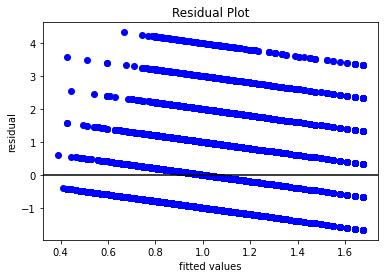

In [272]:
residuals = y- y_predgenerally, there is a high probability to win a match than lose or draw

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

## Approach 2 : Logistics regression
 > Predict whether a team will draw win or lose
 

In [195]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16286 entries, 0 to 16903
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             16286 non-null  int64 
 1   home_team        16286 non-null  object
 2   home_team_score  16286 non-null  int64 
 3   away_team        16286 non-null  object
 4   away_team_score  16286 non-null  int64 
 5   home_team_rank   16286 non-null  int64 
 6   away_team_rank   16286 non-null  int64 
 7   tournament_type  16286 non-null  object
 8   Status (W,L,D)   16286 non-null  object
 9   total_goals      16286 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [273]:
# Pre processing our data
X = fifa.iloc[:, [2,4,5,6,7]]
y = fifa['Status (W,L,D)']
print(X)
print('**********************************')
print(y)

       home_team_score  away_team_score  ...  away_team_rank  tournament_type
0                    0                0  ...              67        World_Cup
1                    0                0  ...              67        World_Cup
2                    2                1  ...               5        World_Cup
3                    0                1  ...               5        World_Cup
4                    1                3  ...               5        World_Cup
...                ...              ...  ...             ...              ...
16899                1                2  ...              12        World_Cup
16900                4                2  ...              32         Friendly
16901                0                1  ...               8        World_Cup
16902                1                1  ...              22        World_Cup
16903                2                0  ...              22        World_Cup

[16286 rows x 5 columns]
**********************************
0  

In [274]:

#Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [276]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [278]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

#  1223 true positives and 2326 true negatives 

array([[1223,    0,    0],
       [   0, 1337,    0],
       [   0,    0, 2326]])

In [279]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Measuring the accuracy of the model
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})
print("The f1 score of the model is", {f1_score(y_test, y_pred, average = "macro")})

The accuracy of the model is {1.0}
The f1 score of the model is {1.0}


### Cross validation

In [280]:
# We will use 4 independent variables for this
X = fifa[['home_team_score', 'away_team_score', 'away_team_rank', 'home_team_rank']]
y = fifa['Status (W,L,D)']


#Encoding categorical variables

y = pd.get_dummies(X, drop_first=True)
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




Mean Absolute Error: 8.58074449129283e-15
Mean Squared Error: 1.7952530051432067e-28
Root Mean Squared Error: 1.3398705180513551e-14


In [281]:
#  Cross validating using kfolds
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -6.007367012217293e-28 and the best parameters are {'fit_intercept': True, 'normalize': True}


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
> - Yes we did.

### b). Do we need other data to answer our question?
> - Yes we do need especially on the ranks data set.

### c). Did we have the right question?
> - Yes we did.

### Conclusions
> -  Generally, there is a high probability to win a match than lose or draw
- Most played matches were friendly matches 
- Our models predicted atleast 2 goals for home team and 1 for away teams.